<a href="https://colab.research.google.com/github/Manikandan192/DataScience/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/fish.csv')


In [4]:
df

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [5]:
col=['Type','weight','l1','l2','l3','height','width']

In [6]:
df.columns=col
df.head()

,Type,weight,l1,l2,l3,height,width
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [7]:
x=df[['weight','l1']]

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of squares
  wcss.append(css)

In [10]:
wcss

[12163548.931309521,
 4395596.050714286,
 1890969.7730908142,
 869669.3939097223,
 489732.7192925014,
 323844.88543055556,
 209617.67085858586,
 124340.21196969697,
 83680.12618398266,
 67047.57412698411]

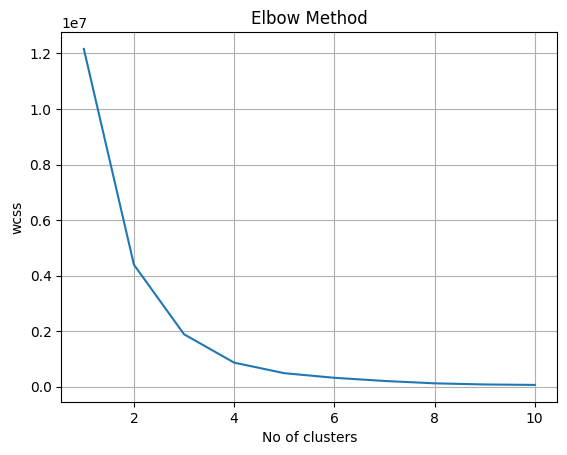

In [12]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [13]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [14]:
cluster_labels=km.predict(x)

In [15]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 1, 1], dtype=int32)

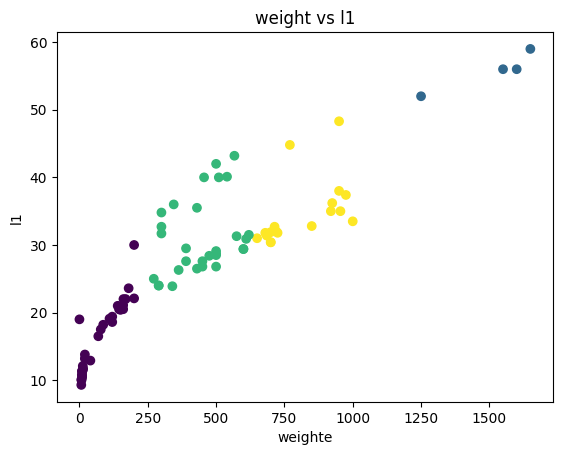

In [16]:
plt.scatter(x['weight'],x['l1'],c=cluster_labels)
plt.xlabel('weighte')
plt.ylabel('l1')
plt.title('weight vs l1')
plt.show()

In [17]:
df['Cluster_Labels']=cluster_labels

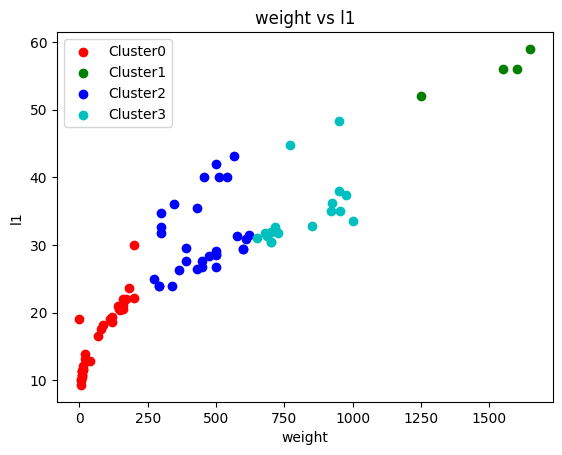

In [18]:
colors=['r','g','b','c']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('weight')
plt.ylabel("l1")
plt.title('weight vs l1')
plt.legend()
plt.show()

In [19]:
def predict_cluster(weight,l1):
  new_data=[[weight,l1]]
  cluster=km.predict(new_data)
  return cluster[0]

In [20]:
weight=20
l1=45
c=predict_cluster(weight,l1)
print(f'Fish belongs to :{c}')

Fish belongs to :0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [22]:
mergings=linkage(x,method='ward')

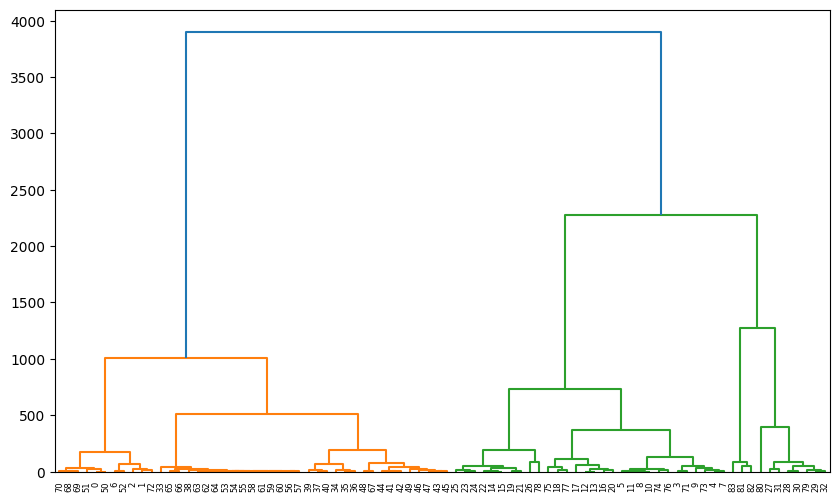

In [23]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [24]:
cluster_labels=fcluster(mergings,2500,criterion='distance')

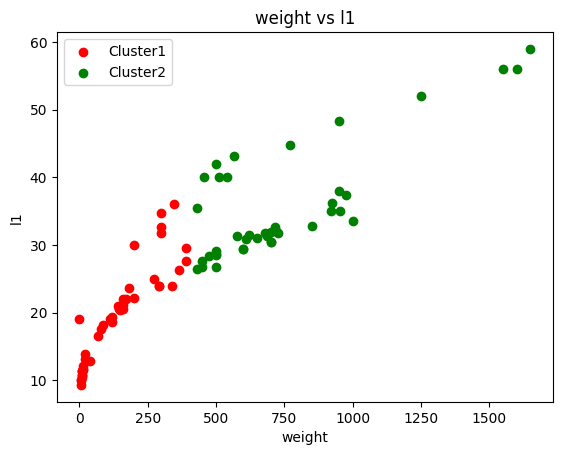

In [25]:
colors=['r','g','b','c']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('weight')
plt.ylabel("l1")
plt.title('weight vs l1')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5833905371647047
